# Зачетная работа по курсу "Системы компьютерной математики"
## Вариант 13 "Метод Ньютона"
### Задание
Написать функцию `mynewton(f, df, [x0, x1])`, реализующую метод Ньютона,
где 
`f` – строка, задающая правую часть $f(x)$ уравнения,
`df` – строка, задающая  $f'(x)$,
`[x0, x1]` – отрезок локализации.
Функция должна возвращать найденный корень с макимально возможной точностью.

Написать программу, тестирующую эту
функцию и сравнивающую ее с `scipy.optimize.newton`, `scipy.optimize.fsolve` на уравнениях:
$$
x^3 - 2x - 5 = 0, \qquad 0\le x \le 3
$$
(исторический пример Валлиса),
$$
\sin x = 0, \qquad 1 \le x \le 4,
$$
$$
x^3  = 0.001, \qquad -1 \le x \le 1,
$$
$$
\ln x + \frac{2}{3} = 0, \qquad 0 \le x \le 1,
$$
$$
\mathop{\rm sgn} (x-2)\, \sqrt{|x-2|} = 0, \qquad 1 \le x \le 4,
$$
$$
 \arctan x = \frac{\pi}{3}, \qquad 0 \le x \le 5,
$$
$$
\frac{1}{x - \pi} = 0, \qquad 0 \le x \le 5.
$$
Программа должна печатать таблицу, в которой указываются найденные функциями `mynewton`,
`scipy.optimize.newton`, `scipy.optimize.fsolve` решения, их относительные ошибки, и количества затраченных итераций.
Сравнить и следать выводы.

### Решение
#### 1. Суть метода Ньютона
Метод Ньютона (метод касательных) заключается в том, что строится касательная к графику функции в точке $x_i$ и находится точка пересечения этой касательной с осью абсцисс, котроая присваивается в качестве следующего приближения $x_{i+1}$ после чего данный процесс повторяется снова.

Таким образом нахождения корня уравнения $f(x) = 0$ с помощью метода Ньютона заключается в итерациях вида $$ x_{i+1} = x_i - \frac {f(x_i)}{f^\prime(x_i)} $$
#### 2. Алгоритм функции
1. Сначала проверим принимает ли функция значения разных знаков на отрезке, на котором она определена. Это является обязательнымм условием существованием хотя бы одного решения.
2. Обозначим точность, максимальное количество итераций.
3. Определим с какого конца отрезка (x0 или x1) лучше начать. Для этого поделим трезок локализации пополам (пусть а - точка середины отрезка) после чего подставим все три точки в функцию и вычислим на какой половине изначального отрезка концы половин имеют разные знаки (т. е. f(a)*(fx0)<=0 или f(a)*f(b)<=0). Если f(a)*(fx0)<=0, то начинаем с точки x0, если же верно обратное утверждение, то начинаем с х1.
4. Произведем проверку деления на ноль при вызове функции и ее производной: если выявилось данное исключение, то вместо изначального значения подставим иное (к примеру вместо х0 подставим х1 и наоборот)
5. Напишем метод Ньютона

In [114]:
from re import A
import numpy as np
from scipy.optimize import newton, fsolve 
import math as m

def mynewton (f, df, x0, x1):
   if (f(x0)*f(x1)>0):
     print ("Фунция не имеет корней")
     return
   max_iter = 50 #максимальное количество итераций
   eps = 1e-12 #точность
   a = (x0 + x1)/2 
   if (f(a)*f(x0)<0):
     a = x0
   else:
     a = x1
   if (df(a)==None or f(a)==None):
    if (a==x0):
        a=x1
    else:
        a=x0
   Xi = a - (f(a)/df(a))
   i = 1
   while (m.fabs(a-Xi)> eps and i<max_iter):
     a = Xi
     Xi = a - (f(a)/df(a))
     i += 1# кол-во итераций
   return [Xi, i]

#### 3. Создание таблицы
Сначала создадим списки решений, количества итераций, относительных ошибок, а также  названий уравнений и функций. Потом напишем функцию podschet, которая реализует все три функции, а также находит их относительные ошибки и добавляет все значения в списки. После этого по очереди проходимся по каждому уравнению (в том порядке, в котром они указаны в условие) и в конце создаем таблицу для наших значений. 

In [118]:
from pandas.core.groupby.groupby import List
from scipy.linalg import dft
import pandas as pd

# списки решений, кол-ва итераций, ошибок и т.д.
lst_uravn = []
lst_znach = []
lst_iter = []
lst_oshibka = []
lst_funk = []

def podschet (x0, x1, f, df, ur):
    X0 = x0
    X1 = x1
    F = f
    Df = df
    mnw, it = mynewton (F, Df, X0, X1)
    nw, n_iter = newton(F, X1, Df, tol = 1e-12, full_output= True, disp = False)
    d, infodict, ier, mesg  = fsolve ( F, X1, xtol= 1e-12, full_output = True )

#относительные ошибки
    pogr_mnt = abs((mnw - nw)/nw)
    pogr_nt = abs((nw - mnw)/mnw)
    pogr_fs = abs((d[0]- mnw)/mnw)
    
    lst_uravn.extend([ur, ur, ur])
    lst_funk.extend (["Mynewton", "Optimize.newton", "Optimize.fsolve"])

    lst_znach.extend([mnw, nw, d[0]])
    lst_iter.extend([it, n_iter.iterations, infodict['nfev']])
    lst_oshibka.extend([pogr_mnt, pogr_nt, pogr_fs])

#функция x^3 - 2x - 5 = 0
def f (x): 
    return x**3-2*x-5

def df (x):
    return 3*x**2 - 2

x0 = 0
x1 = 3
ur = "x^3 - 2x - 5 = 0"

podschet(x0, x1, f, df, ur)

#функция sin(x) = 0
def f(x):
    return np.sin(x)

def df (x):
    return np.cos(x)

x0=1
x1=4
ur = "sin(x) = 0"

podschet(x0, x1, f, df, ur)

#функция x^3 - 0.001 = 0
def f(x):
    return x**3-0.001

def df(x):
    return 3*x**2

x0=-1
x1=1
ur = "x^3 = 0.001"
podschet(x0, x1, f, df, ur)

#функция ln(x) +2/3 = 0
def f(x):
    return np.log(x) + 2/3

def df (x):
    return 1/x

x0=0
x1=1
ur = "ln(x) + 2/3 = 0"
podschet(x0, x1, f, df, ur)

#функция sgn(x-2)*sqrt(|x-2|)=0
def f (x):
    return np.sign(x-2)*np.sqrt(np.abs(x-2))
def df (x):
    return (np.sign(x - 2)/3) * np.abs(x-2)**(-2/3)

x0 = 1
x1 = 4
ur = "sgn(x-2) * sqrt(|x-2|)"
podschet (x0, x1, f, df, ur)

#функция arctan(x) - pi/3 = 0
def f (x):
    return np.arctan(x) - (np.pi / 3)
def df (x):
    return 1/(x**2+1)
x0 = 0
x1 = 5
ur = "arctan(x) - pi/3 = 0"
podschet (x0, x1, f, df, ur)

# функция 1/(x-pi) = 0
def f (x):
    return 1/(x-np.pi)
def df (x):
    return -1 / ((x - np.pi)**2)
x0 = 0
x1 = 5
ur = "1/(x-pi) = 0"
podschet (x0, x1, f, df, ur)

#печатание таблицы
data = {"Функция":lst_funk, "Уравнение":lst_uravn, "Значение функции":lst_znach, "Кол-во итераций": lst_iter, "Относительная ошибка":lst_oshibka}
table = pd.DataFrame(data)
table



C:\Users\alex\AppData\Local\Temp\ipykernel_37356\1728929248.py:73: RuntimeWarning: divide by zero encountered in log
  return np.log(x) + 2/3
C:\Users\alex\AppData\Local\Temp\ipykernel_37356\1440443026.py:26: RuntimeWarning: overflow encountered in double_scalars
  Xi = a - (f(a)/df(a))
C:\Users\alex\AppData\Local\Temp\ipykernel_37356\1440443026.py:24: RuntimeWarning: invalid value encountered in double_scalars
  while (m.fabs(a-Xi)> eps and i<max_iter):
C:\Users\alex\AppData\Local\Temp\ipykernel_37356\1728929248.py:22: RuntimeWarning: invalid value encountered in double_scalars
  pogr_mnt = abs((mnw - nw)/nw)
C:\Users\alex\AppData\Local\Temp\ipykernel_37356\1728929248.py:23: RuntimeWarning: invalid value encountered in double_scalars
  pogr_nt = abs((nw - mnw)/mnw)
C:\Users\alex\AppData\Local\Temp\ipykernel_37356\1728929248.py:98: RuntimeWarning: overflow encountered in double_scalars
  return 1/(x**2+1)


,Функция,Уравнение,Значение функции,Кол-во итераций,Относительная ошибка
0,Mynewton,x^3 - 2x - 5 = 0,2.0945514815423265e+00,6,0.0000000000000000e+00
1,Optimize.newton,x^3 - 2x - 5 = 0,2.0945514815423265e+00,6,0.0000000000000000e+00
2,Optimize.fsolve,x^3 - 2x - 5 = 0,2.0945514815423265e+00,10,0.0000000000000000e+00
3,Mynewton,sin(x) = 0,3.1415926535897931e+00,5,0.0000000000000000e+00
4,Optimize.newton,sin(x) = 0,3.1415926535897931e+00,5,0.0000000000000000e+00
5,Optimize.fsolve,sin(x) = 0,3.1415926535897931e+00,8,0.0000000000000000e+00
6,Mynewton,x^3 = 0.001,9.9999999999999992e-02,11,0.0000000000000000e+00
7,Optimize.newton,x^3 = 0.001,9.9999999999999992e-02,11,0.0000000000000000e+00
8,Optimize.fsolve,x^3 = 0.001,1.0000000000000001e-01,17,1.3877787807814457e-16
9,Mynewton,ln(x) + 2/3 = 0,5.1341711903259202e-01,7,0.0000000000000000e+00


#### 4. Анализ полученных данных
Как можем заметить из таблицы, метод Ньютона (как mynewton, так и optimize.newton) справляются с решением уравнения почти в 2 раза быстрее, нежели функция optimize.fsolve. Это связано с тем, что сходимость метода касательных квадратичная, а порядок сходимости равен 2. По этой причине сходимость метода касательных Ньютона очень быстрая. Но у функций, реализующих метод Ньютона также есть большой недостаток в виде обязательного условия непрерывности функции. Рассмотрим это на примере уравнения sgn(x-2)*sqrt(|x-2|) = 0. Функция, заданная данным уравнением, прерывается в точке O(2;0), которая входит в промежуток локализации, вследствие чего решение не может быть найдено с помощью метода Ньютона и компилятор выводит ошибку. В то же время функция optimize.fsolve выводит максимально приближенное к корню уравнения значение. 
Различия же между optimize.newton и mynewton мы можем пронаблюдать на примере уравнения arctan(x) - pi/3 = 0, где библиотечная функция выдает неверное значение. Это связано с тем, что в данном случае метод Ньютона необходимо начинать с точки x0 (а не с точки x1, как мы это сделали), но заранее определить с какого имеено конца отрезка стоит приступить не является возможным. В это же время в функцию mynewton включена проверка подобной ситуации. 
Последнее уравнение имеет следующий вид:

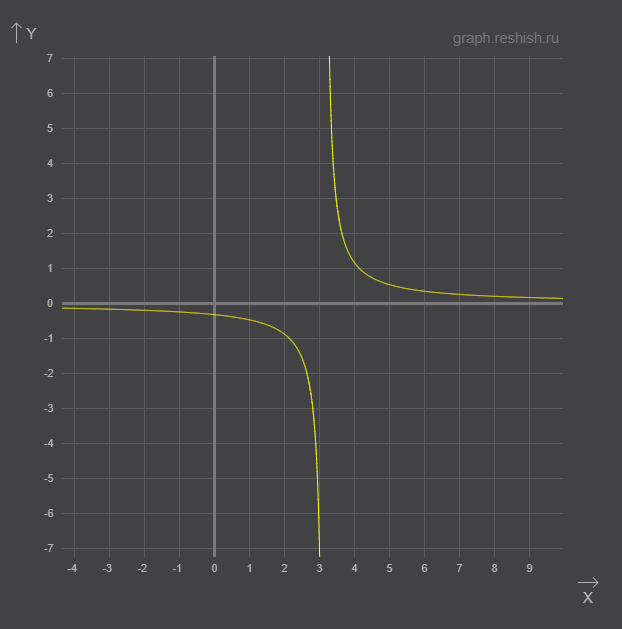

Как мы можем здесь наблюдать функция 1/(x-pi) не пересекает ось Ox, а лишь стремится к $-\infty$ слева и к $\infty$ справа.Следовательно, несмотря на то, что значения функции на концах отрезка локализации имеют противоположные знаки, уравнение 1/(x-pi)=0 не имеет решения. 

### Выводы
- Из-за квадратичной сходимости метод Ньютона работает быстрее, но требует вычисление производной
- Метод Ньютона можно использовать только на непрерывных функциях, так что если нет уверенности в данной характеристике функции, лучше использовать альтернативные методы
- Даже если значения функции на концах отрезка локализации имеют противоположные знаки, еще не значит, что уранение функции имеет корни
- Метод Ньютона лучше всего использовать в тех случаях, когда вам необходимо найти корень функции за как можно меньшее количество итераций и вы уверены, что функция соответствует всем нужным требованиям. В ином случае лучше будет воспользоваться альтернативой